In [7]:
import pandas as pd
import numpy  as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('BMW_Car_Sales_Classification.csv')

In [9]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [10]:
data.isnull().sum()
print(data.isna().sum())

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


In [11]:

import autoviz as av
av.AutoViz_Class()
AV = av.AutoViz_Class()
df = AV.AutoViz('BMW_Car_Sales_Classification.csv')
df.head()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (50000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Model,object,0.000000,0,,,No issue
Year,int64,0.000000,0,2010.000000,2024.000000,Possible date-time colum: transform before modeling step.
Region,object,0.000000,0,,,No issue
Color,object,0.000000,0,,,No issue
Fuel_Type,object,0.000000,0,,,No issue
Transmission,object,0.000000,0,,,No issue
Engine_Size_L,float64,0.000000,NA,1.500000,5.000000,No issue
Mileage_KM,int64,0.000000,88,3.000000,199996.000000,No issue
Price_USD,int64,0.000000,76,30000.000000,119998.000000,No issue
Sales_Volume,int64,0.000000,19,100.000000,9999.000000,No issue


All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


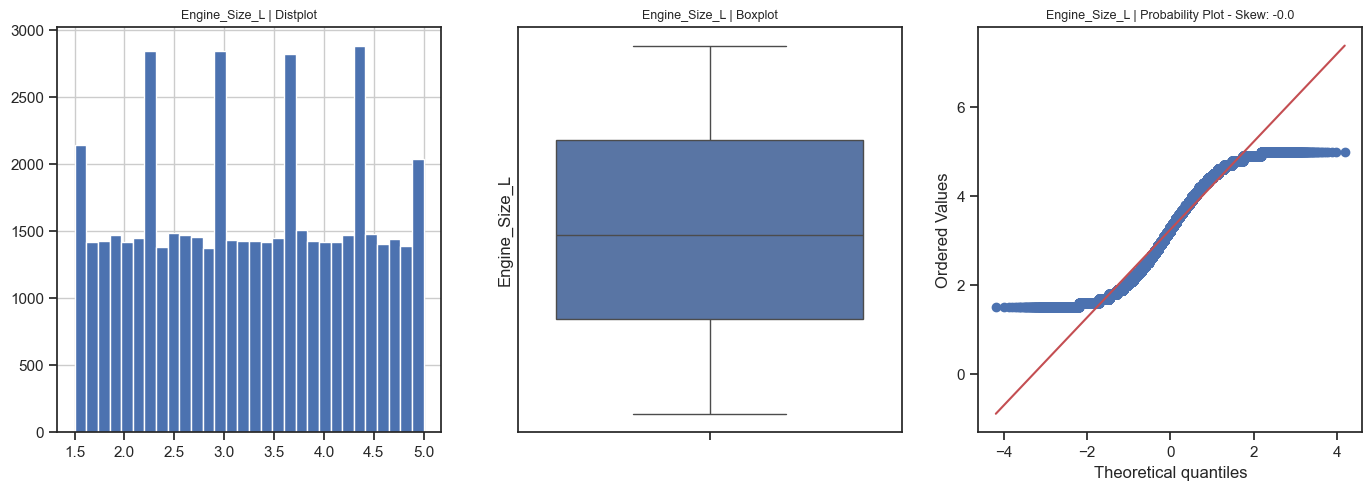

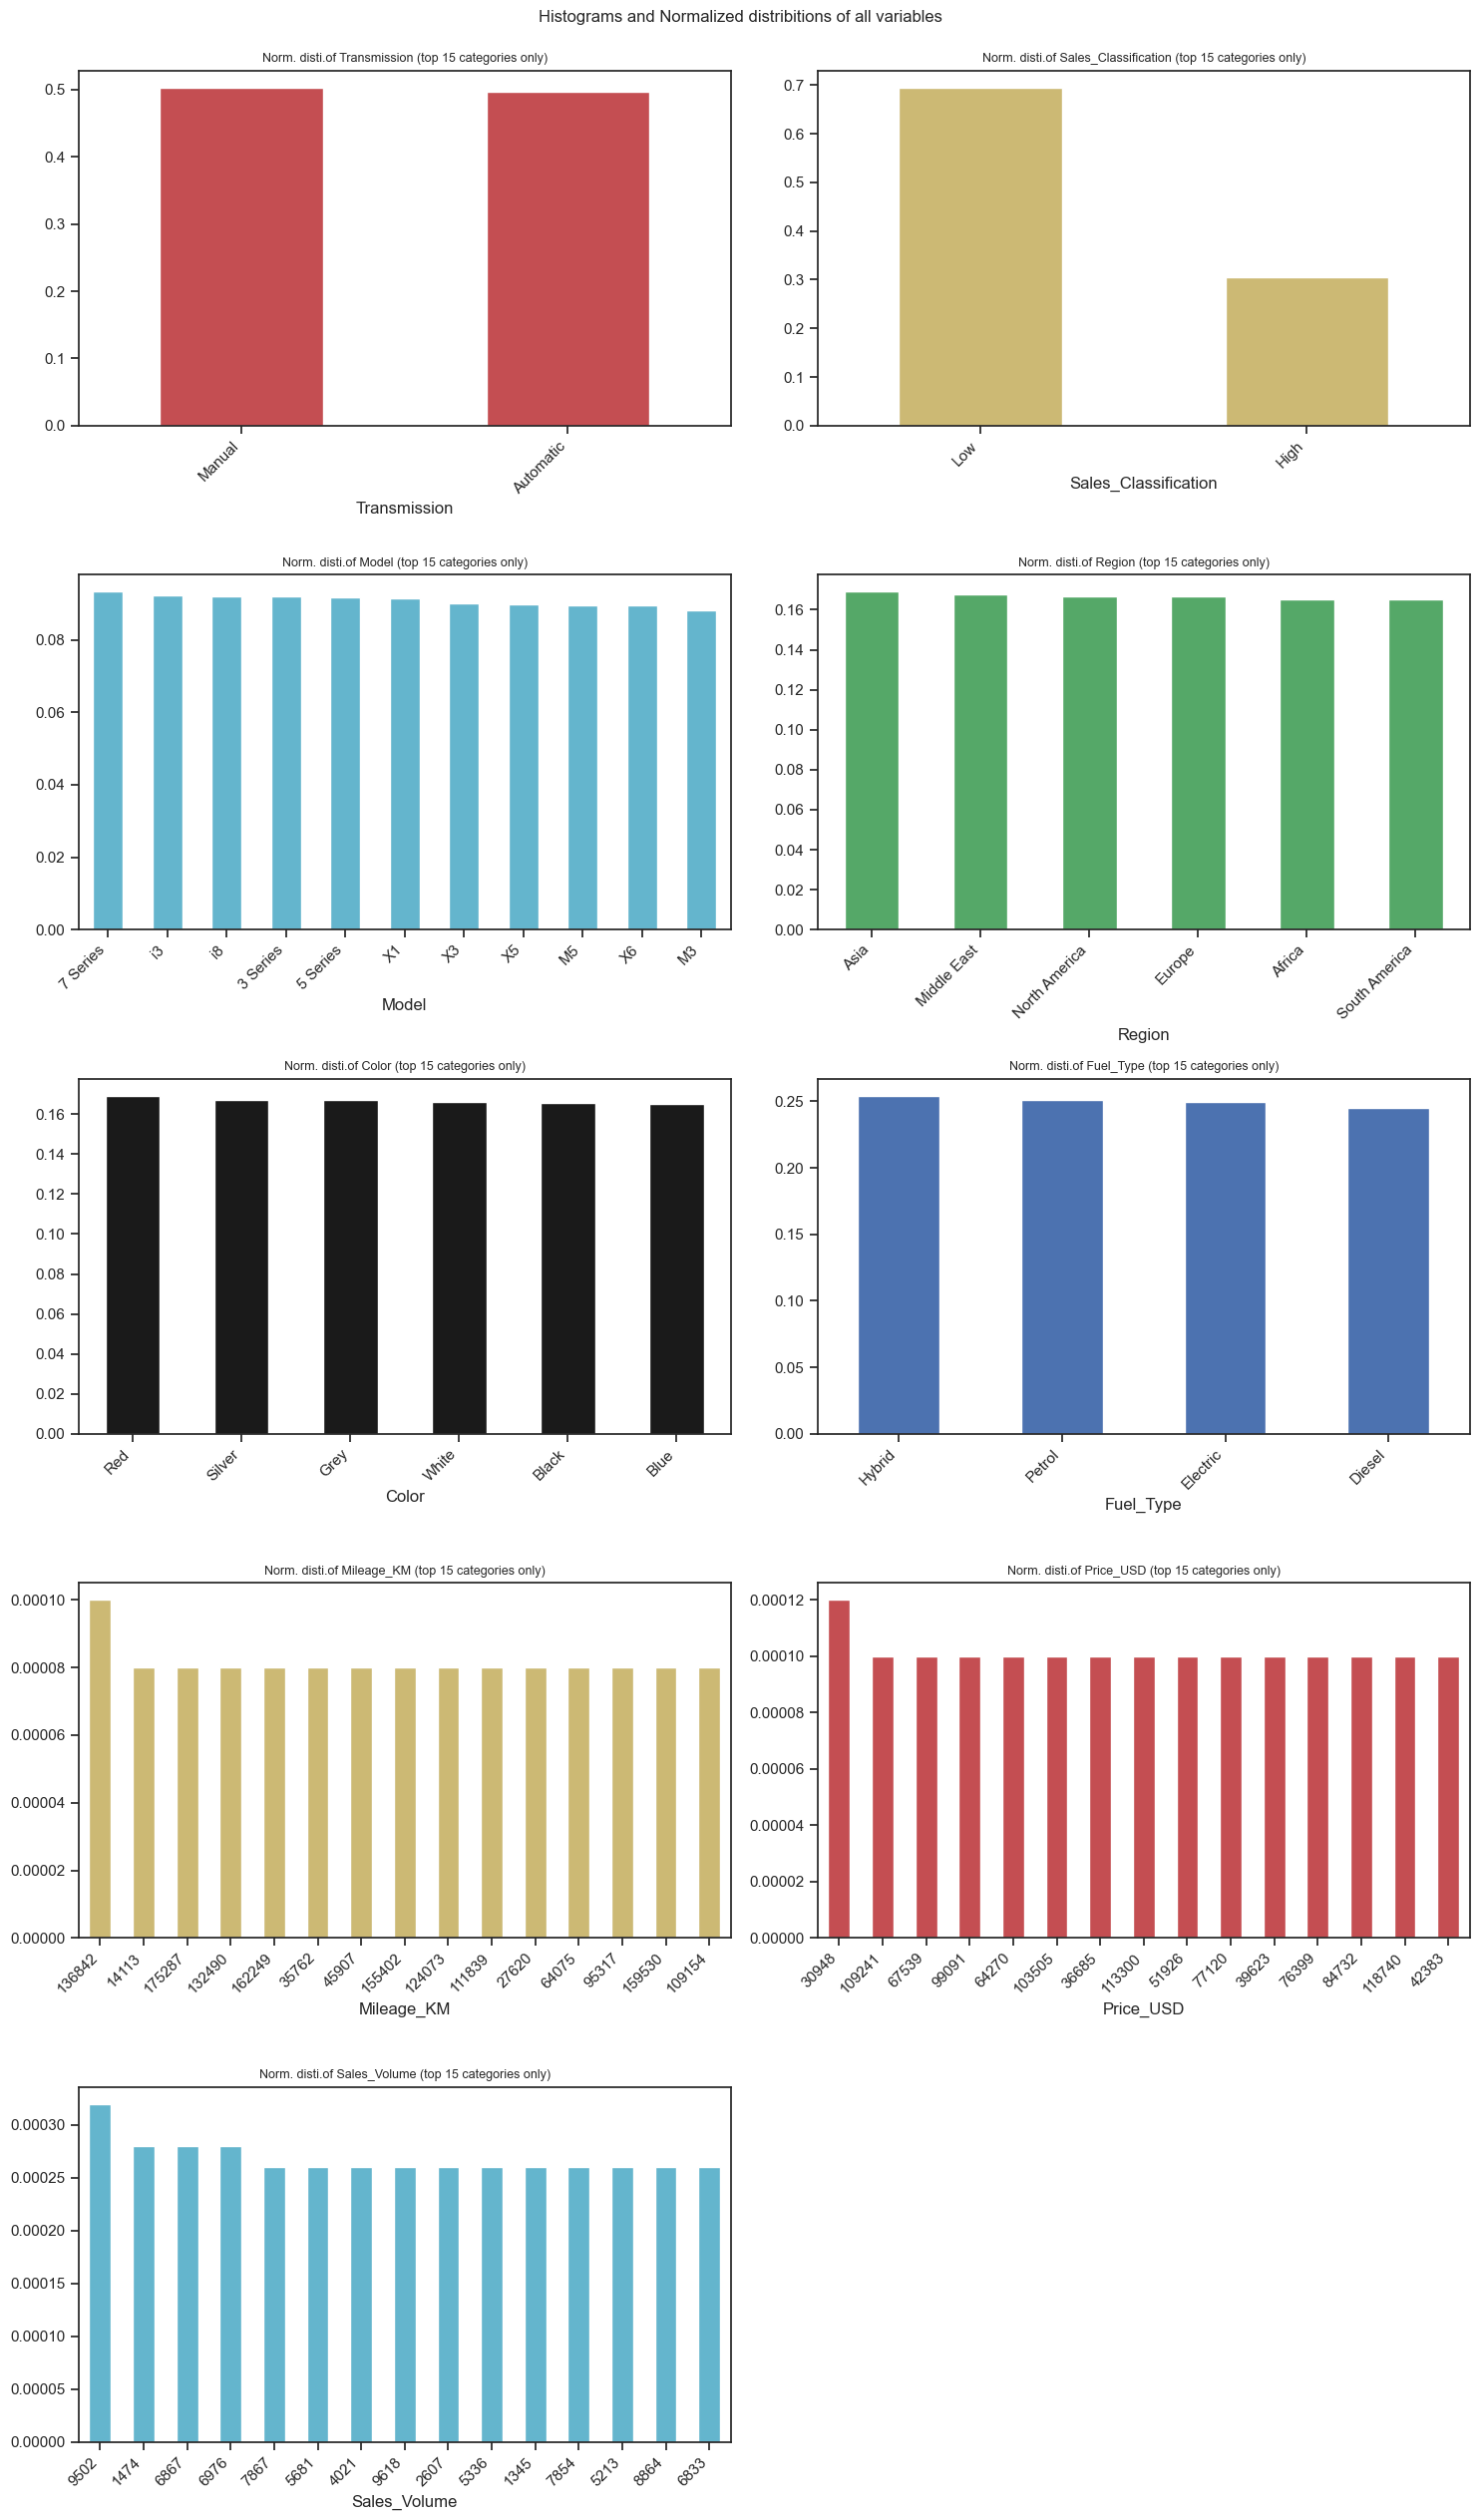

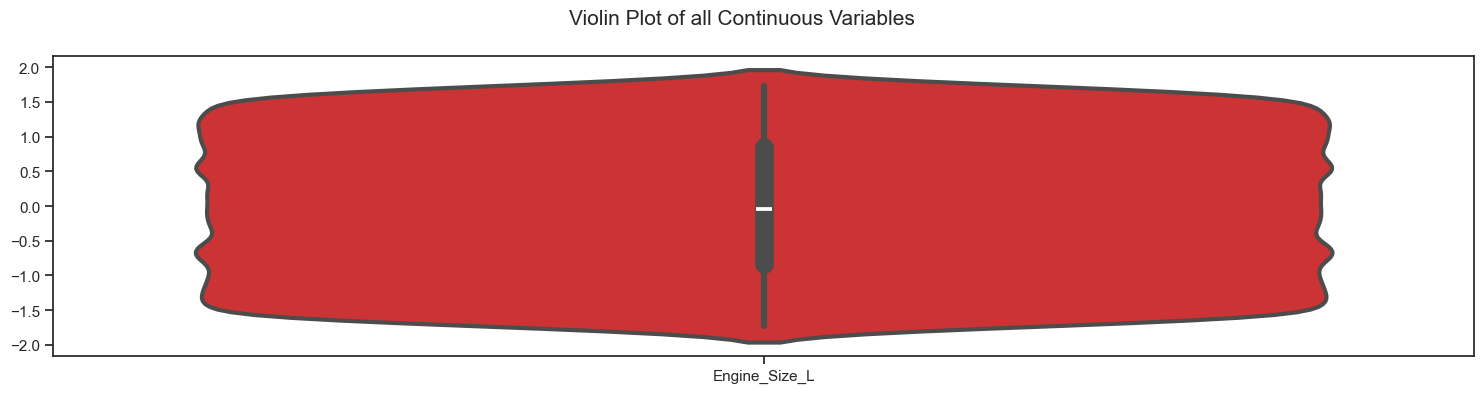

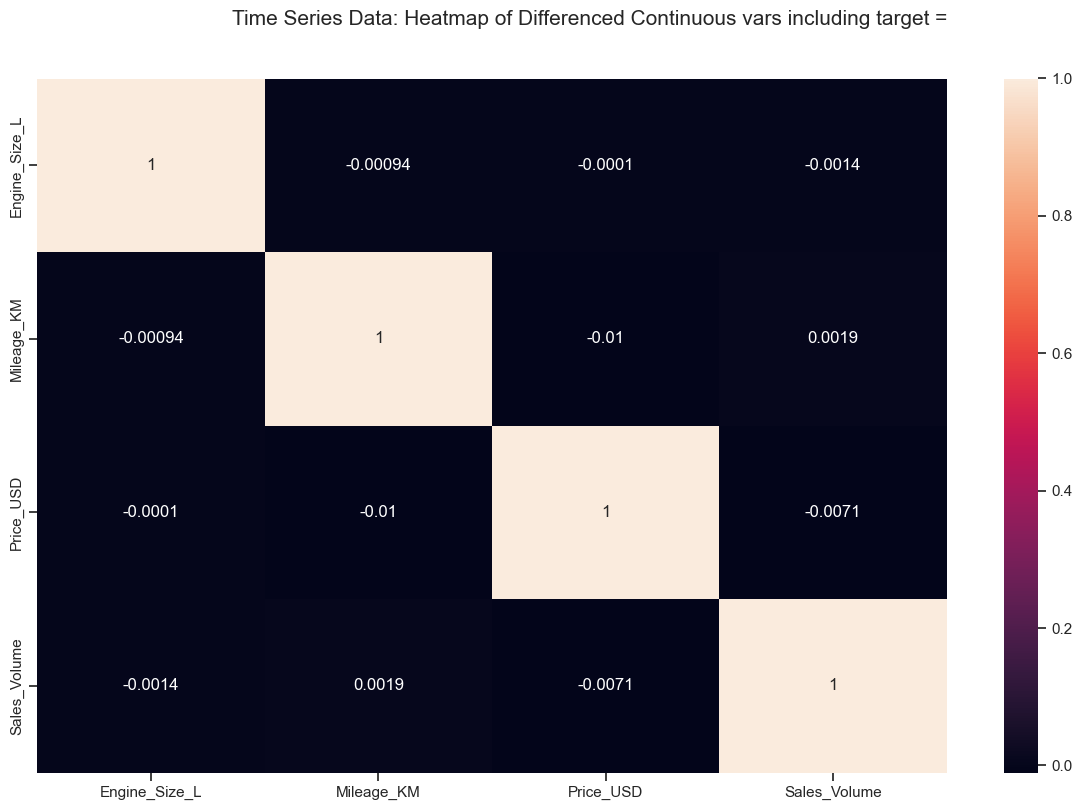

<Figure size 1500x0 with 0 Axes>

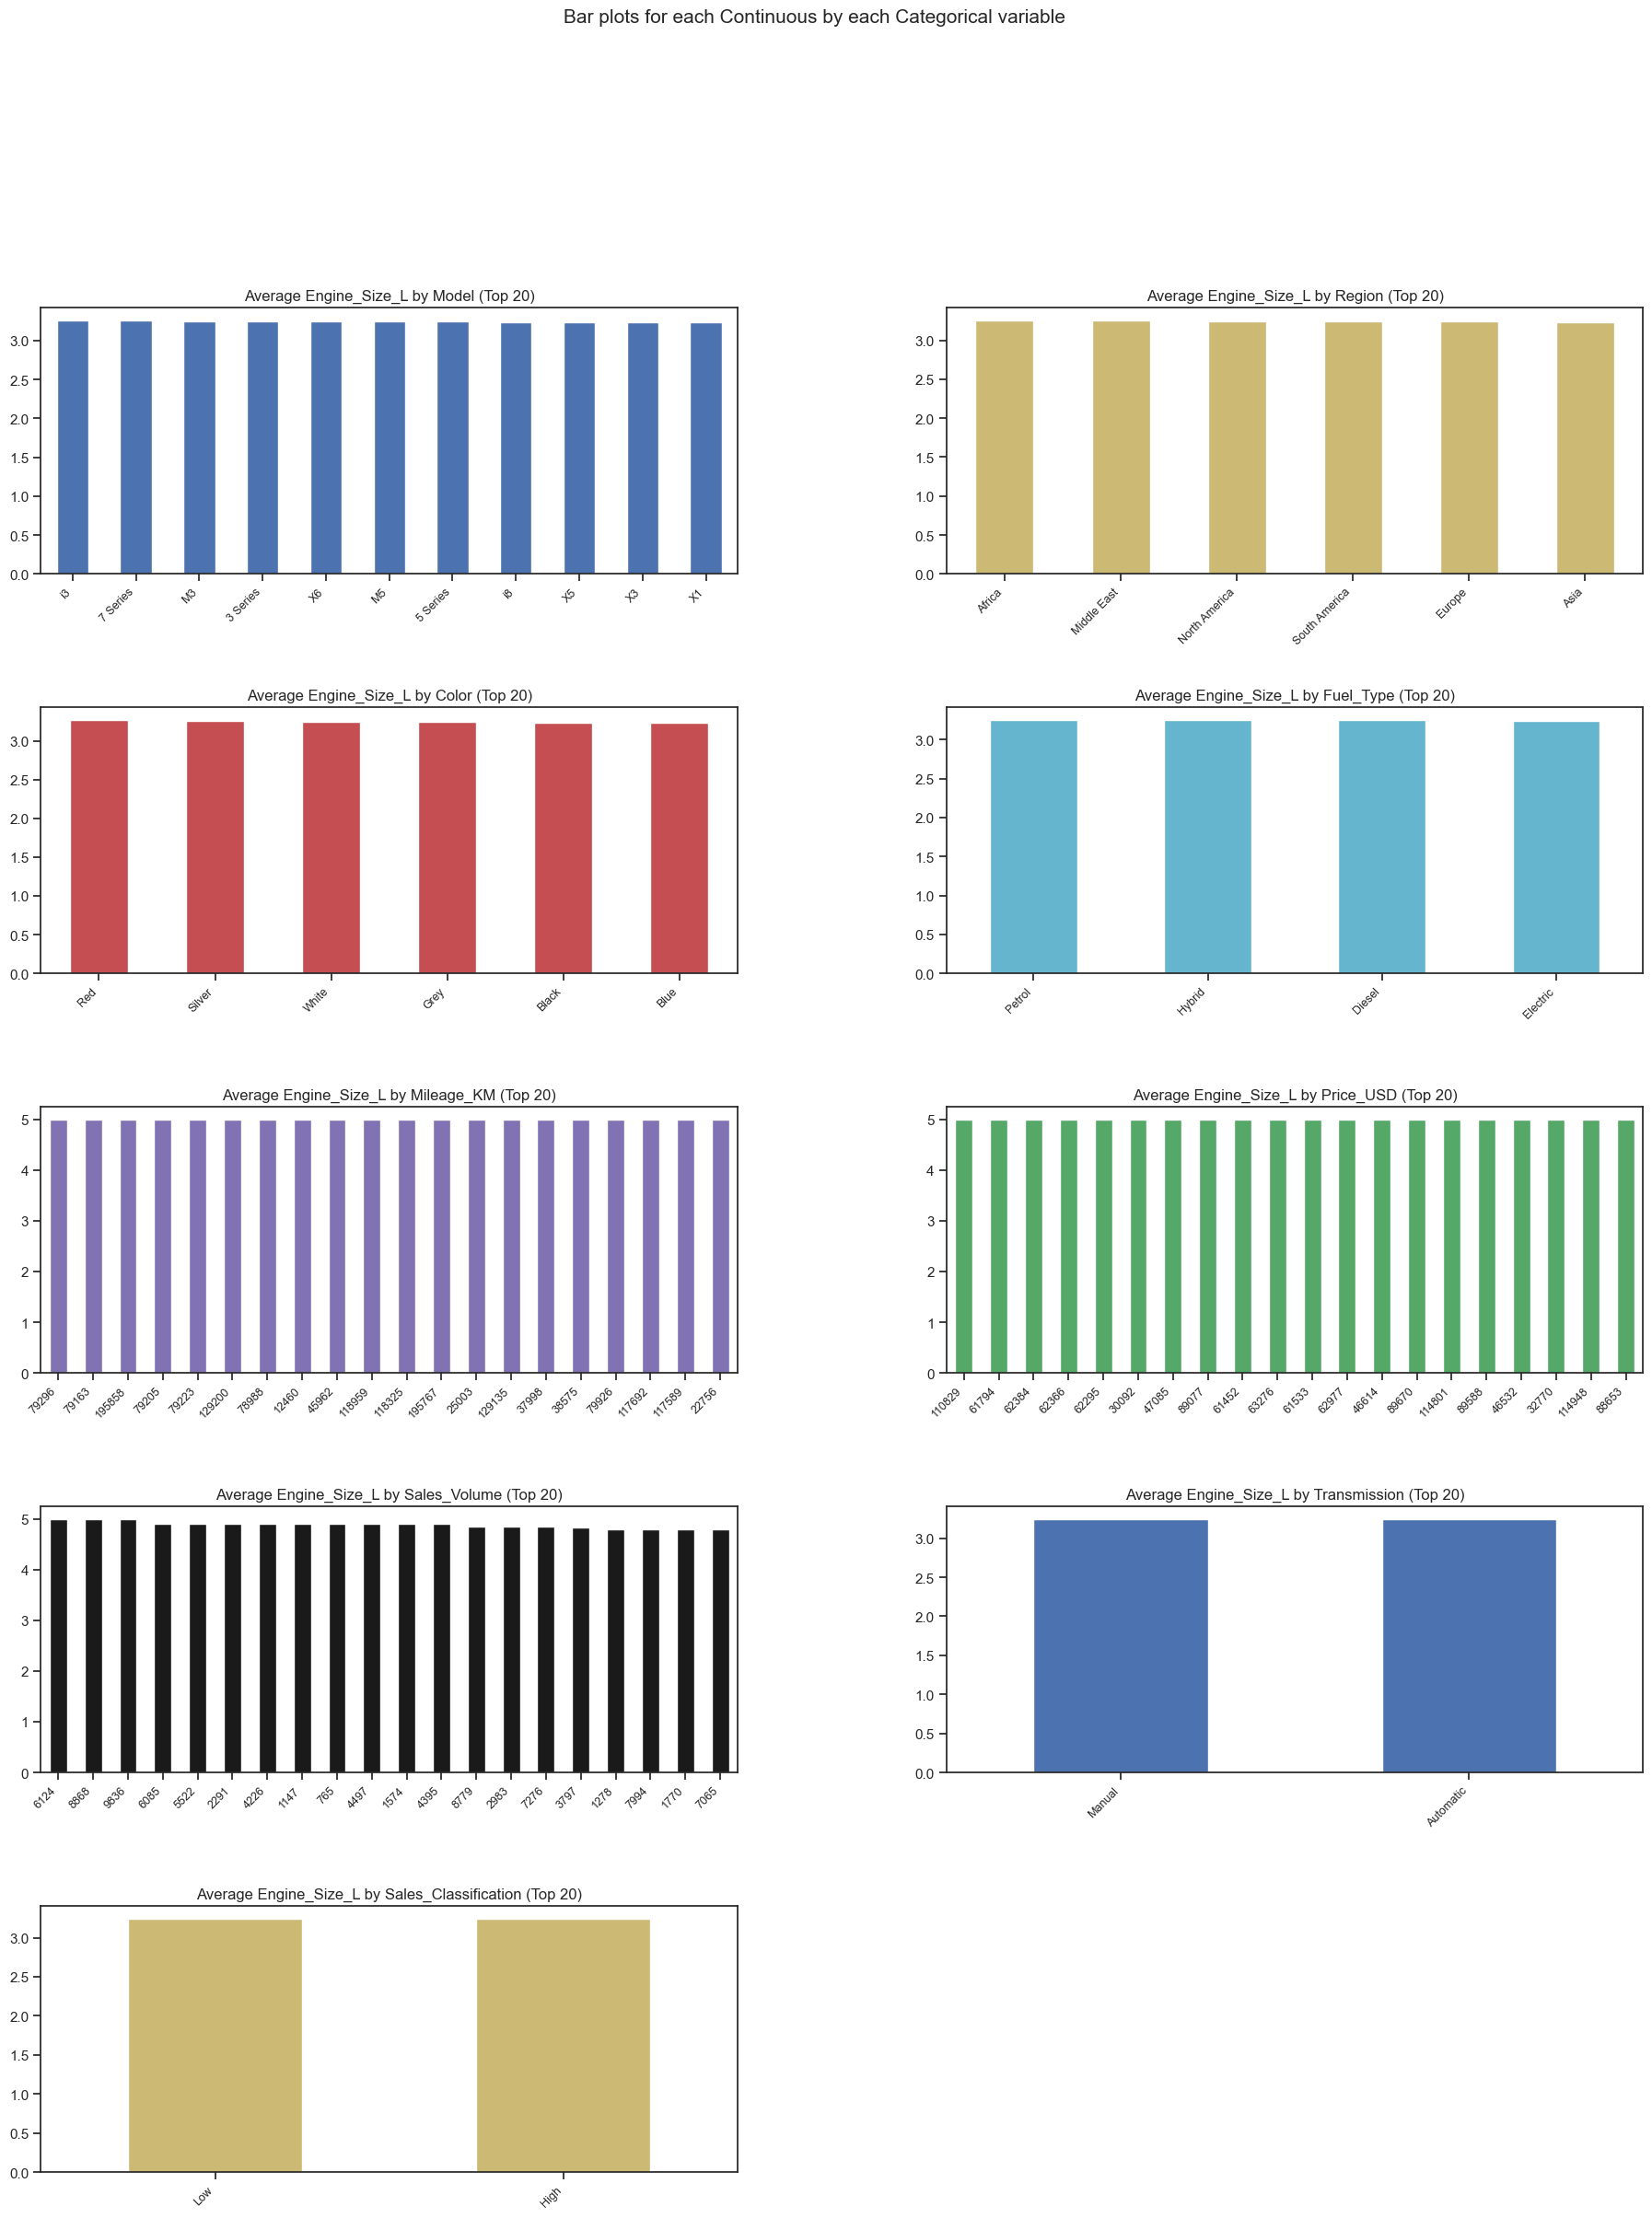

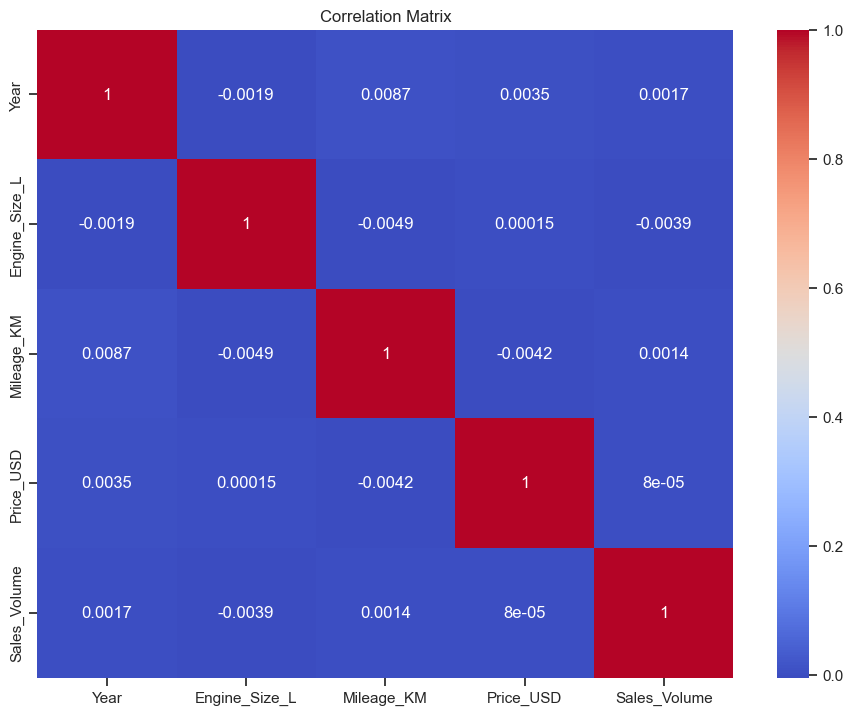

In [12]:
%matplotlib inline
cor = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

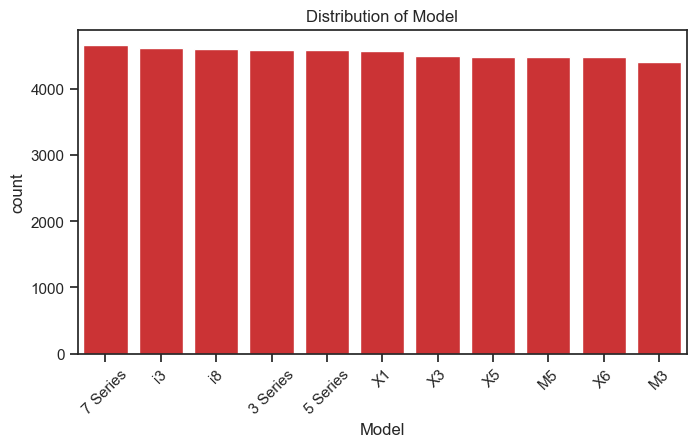

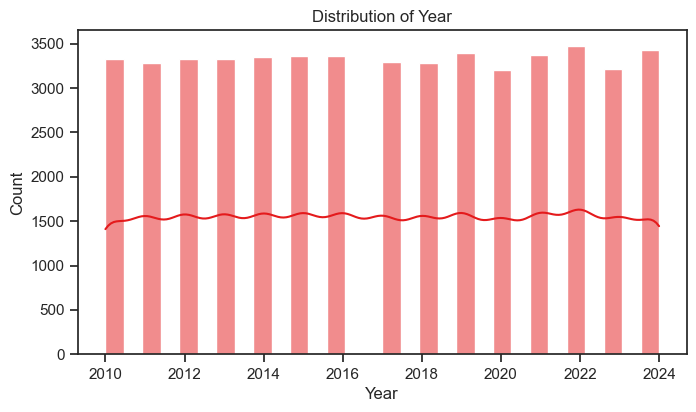

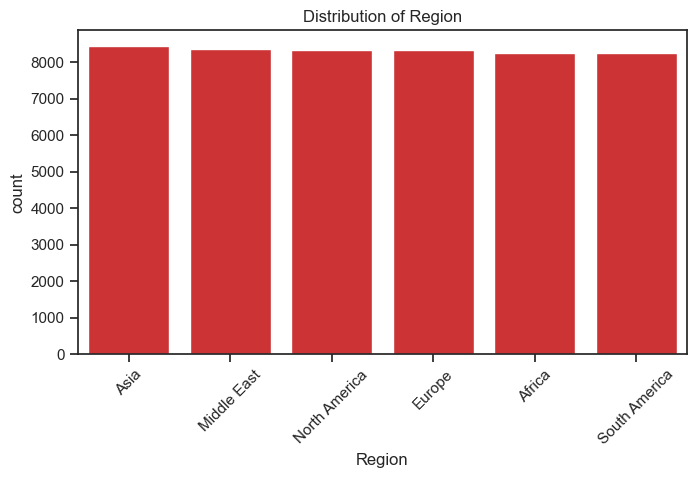

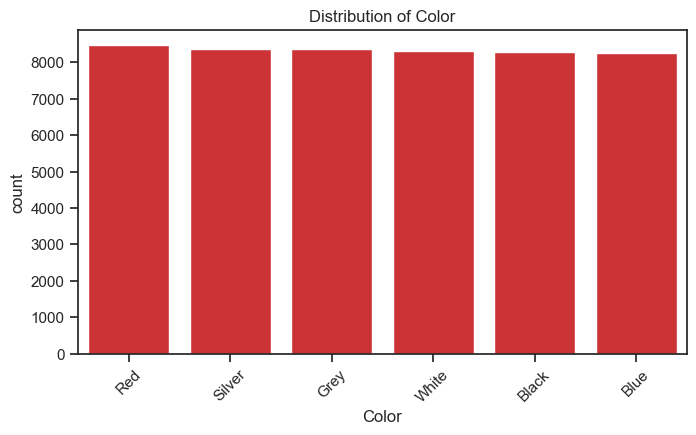

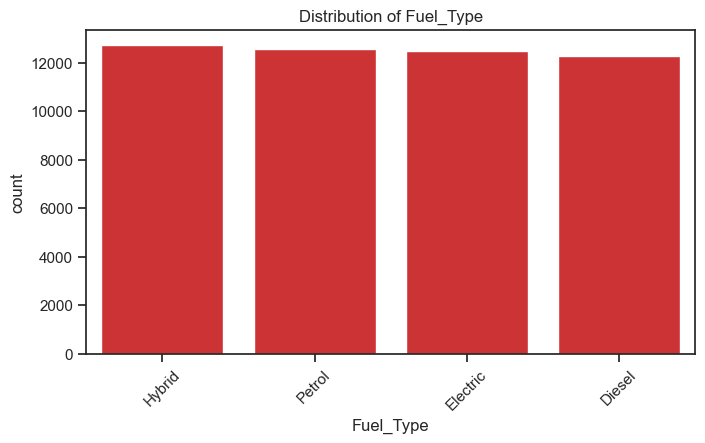

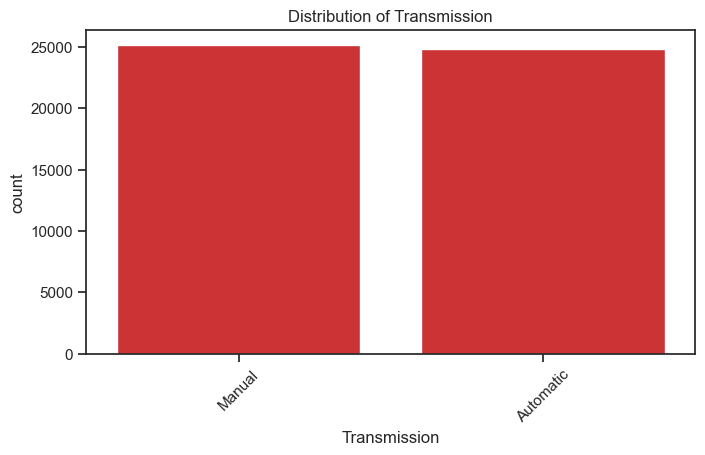

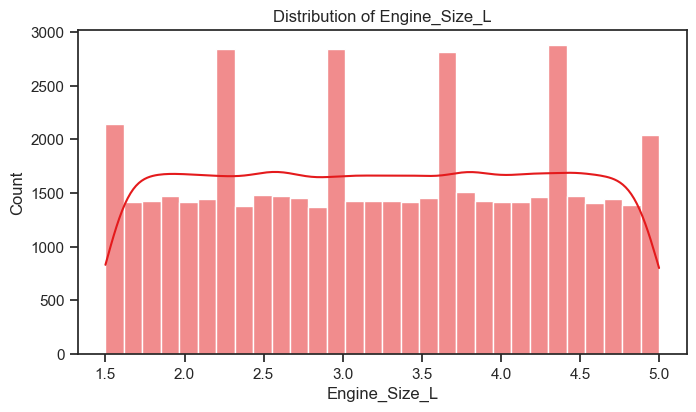

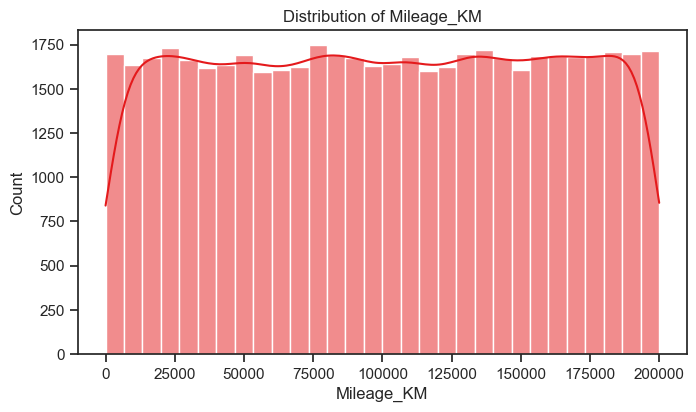

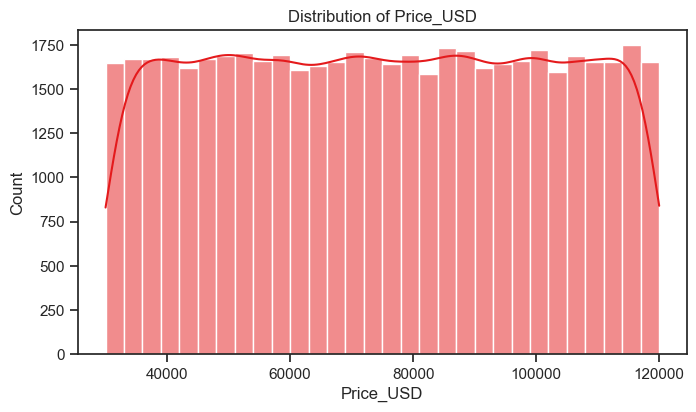

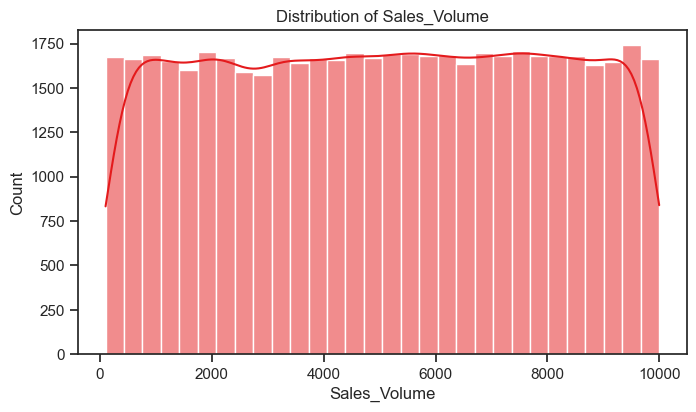

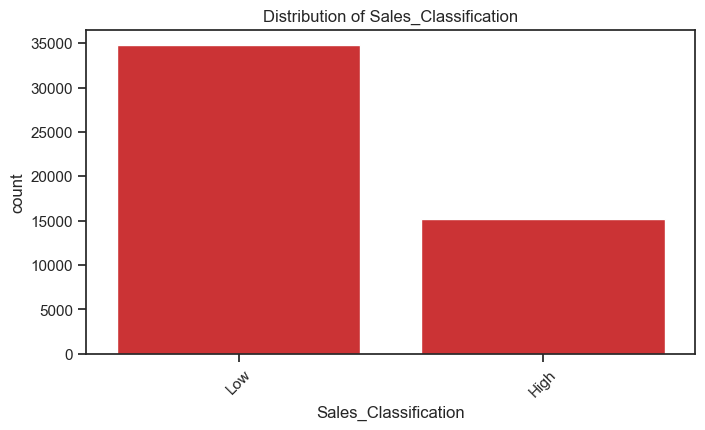

In [25]:
for column in data.columns:
    plt.figure(figsize=(7,4))

    if data[column].dtype == 'object':
        sns.countplot(x=data[column], order=data[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
    else:
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')

    plt.show()

Year            -0.001496
Engine_Size_L   -0.001285
Mileage_KM      -0.006677
Price_USD       -0.000034
Sales_Volume    -0.012126
dtype: float64


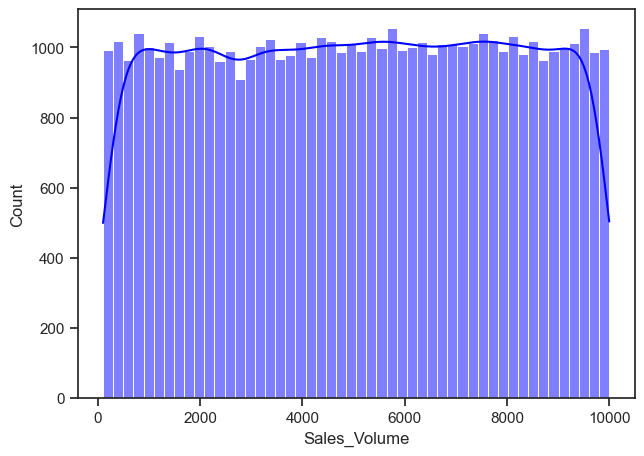

In [18]:
sns.histplot(data['Sales_Volume'], bins=50, kde=True, color="blue")
print(data.select_dtypes(include=[np.number]).skew())


Year            -0.001496
Engine_Size_L   -0.001285
Mileage_KM      -0.006677
Price_USD       -0.000034
Sales_Volume    -0.265011
dtype: float64


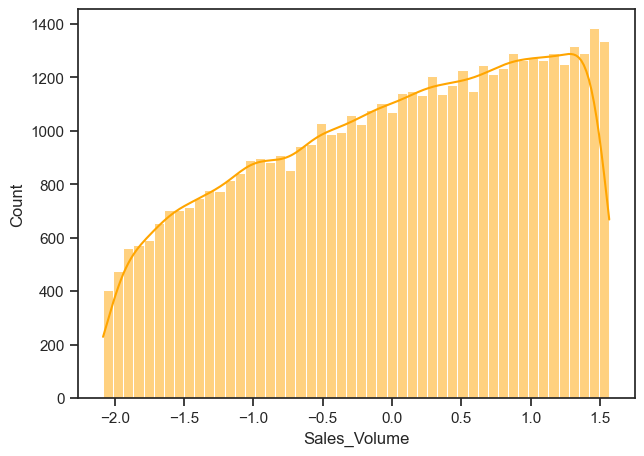

In [24]:
tinker = data.copy()
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
tinker['Sales_Volume'] = pt.fit_transform(tinker[['Sales_Volume']])
sns.histplot(tinker['Sales_Volume'], bins=50, kde=True, color="orange")   
print(tinker.select_dtypes(include=[np.number]).skew())


Year            -0.001496
Engine_Size_L   -0.001285
Mileage_KM      -0.006677
Price_USD       -0.000034
Sales_Volume     0.007427
dtype: float64


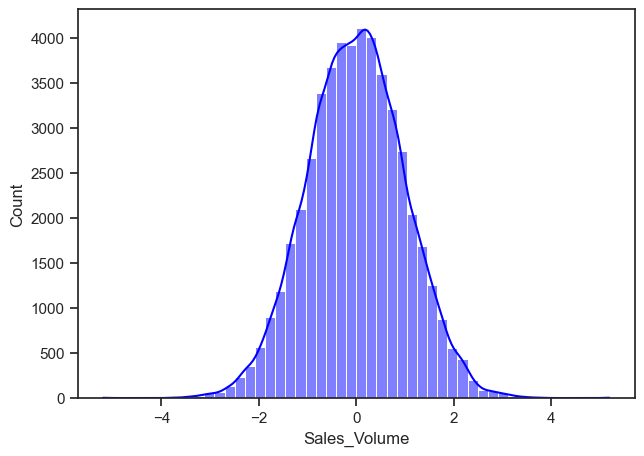

In [21]:
tkinter = data.copy()
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal') 
tkinter['Sales_Volume'] = qt.fit_transform(tkinter[['Sales_Volume']])
sns.histplot(tkinter['Sales_Volume'], bins=50, kde=True, color="blue")   
print(tkinter.select_dtypes(include=[np.number]).skew())

Year            -0.001496
Engine_Size_L   -0.001285
Mileage_KM      -0.006677
Price_USD       -0.000034
Sales_Volume    -1.421454
dtype: float64


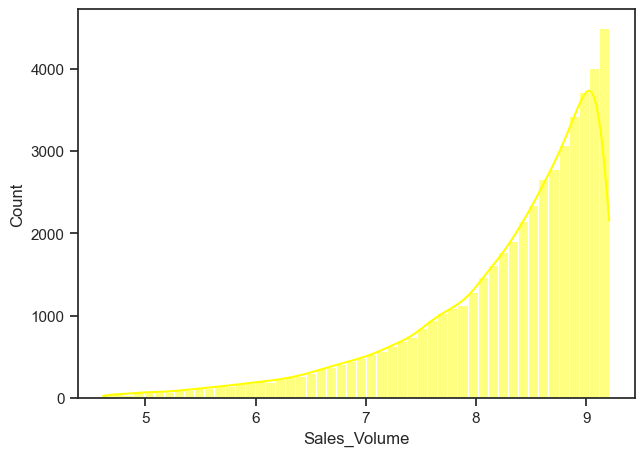

In [23]:
fd = data.copy()
fd['Sales_Volume'] = np.log1p(fd['Sales_Volume'])
sns.histplot(fd['Sales_Volume'], bins=50, kde=True, color="yellow")
print(fd.select_dtypes(include=[np.number]).skew())


Year            -0.001496
Engine_Size_L   -0.001285
Mileage_KM      -0.006677
Price_USD       -0.000034
Sales_Volume    -0.012126
Year_scaled     -0.001496
dtype: float64


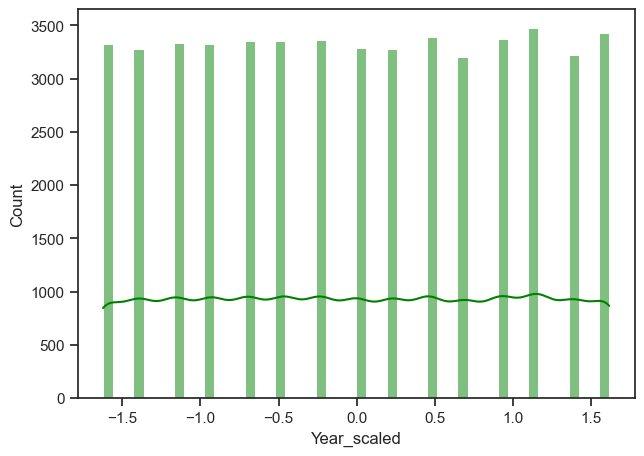

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Year_scaled'] = scaler.fit_transform(data[['Year']])
sns.histplot(data['Year_scaled'], bins=50, kde=True, color="green")
print(data.select_dtypes(include=[np.number]).skew())


In [27]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Year_scaled
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,-0.234876
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,-0.928611
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,1.152595
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1.615085
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,0.690105


In [30]:
data['Transmission'] = data['Transmission'].map({'Automatic': 0, 'Manual': 1})

In [44]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Year_scaled
0,5 Series,2016,Asia,Red,Petrol,1,3.5,151748,98740,0.939636,High,-0.234876
1,i8,2013,North America,Red,Hybrid,0,1.6,121671,79219,-0.458818,Low,-0.928611
2,5 Series,2022,North America,Blue,Petrol,0,4.5,10991,113265,0.492887,Low,1.152595
3,X3,2024,Middle East,Blue,Petrol,0,1.7,27255,60971,-0.285762,Low,1.615085
4,7 Series,2020,South America,Black,Diesel,1,2.1,122131,49898,-0.555462,Low,0.690105


In [47]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal') 
data['Sales_Volume'] = qt.fit_transform(data[['Sales_Volume']])
data['Price_USD'] = qt.fit_transform(data[['Price_USD']])
data['Mileage_KM'] = qt.fit_transform(data[['Mileage_KM']])
data['Engine_Size_L'] = qt.fit_transform(data[['Engine_Size_L']])

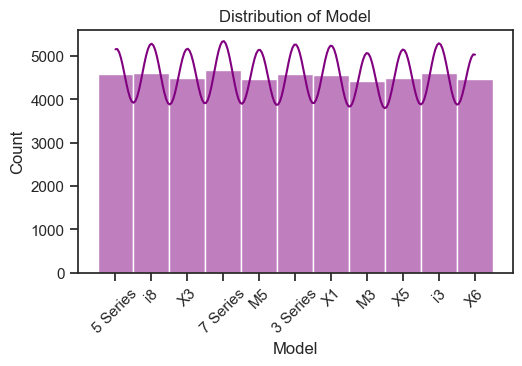

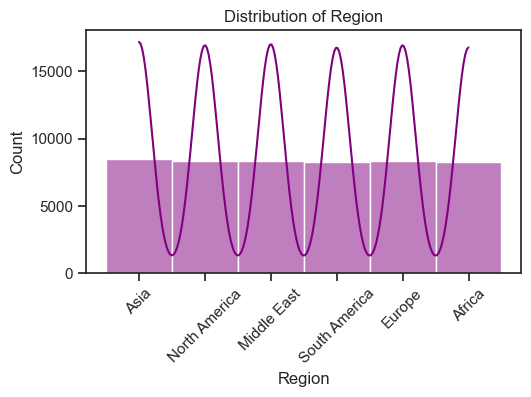

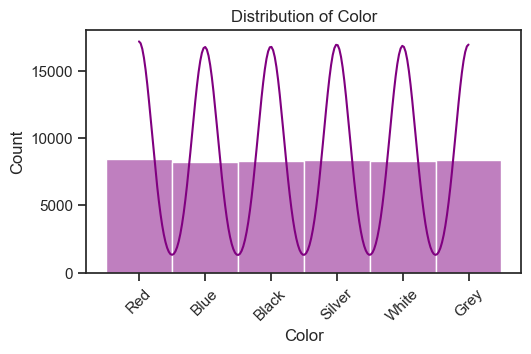

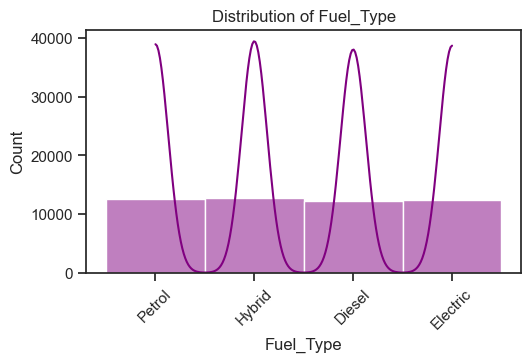

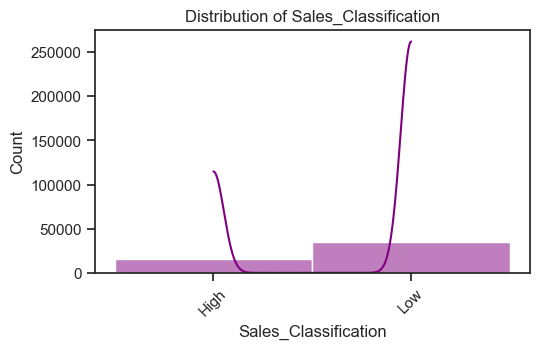

In [48]:
for column in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data[column], kde=True, bins=30, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 700x400 with 0 Axes>

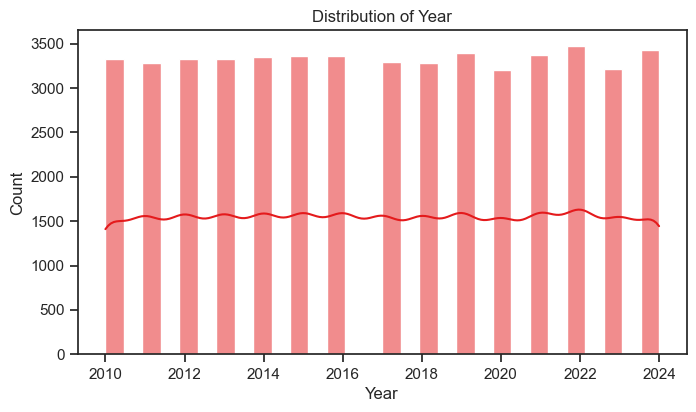

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

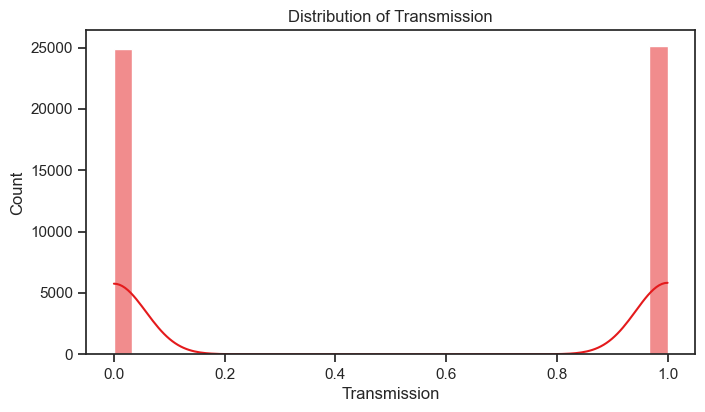

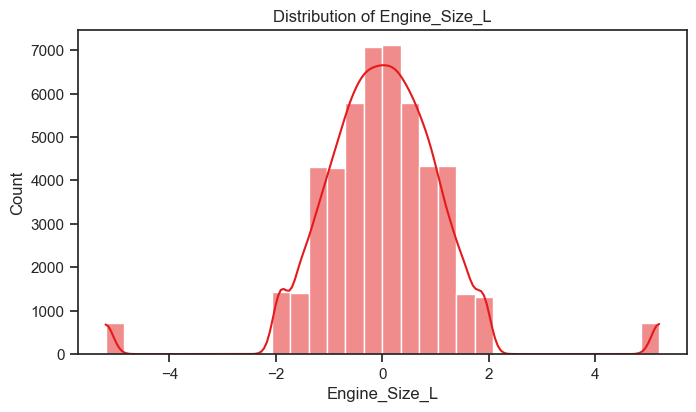

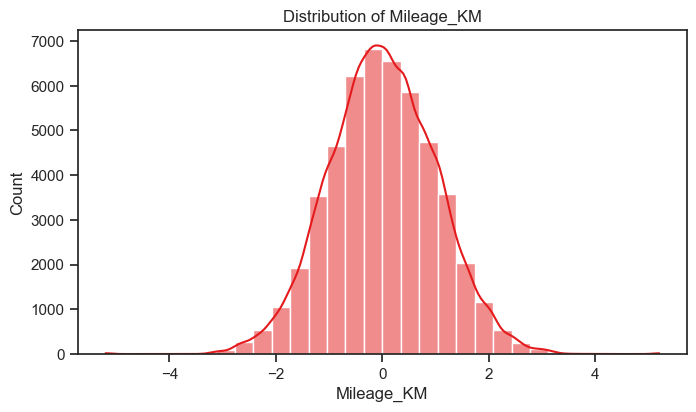

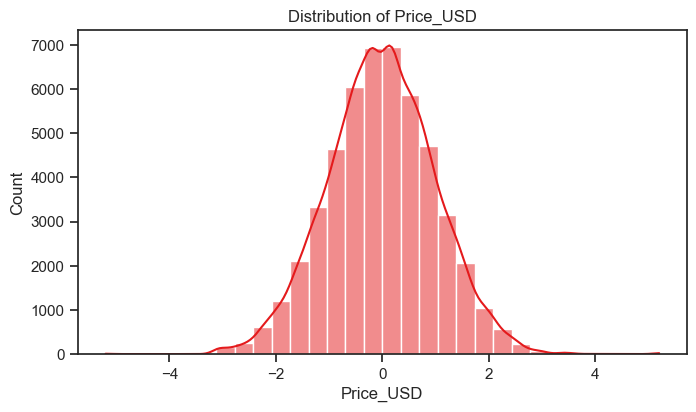

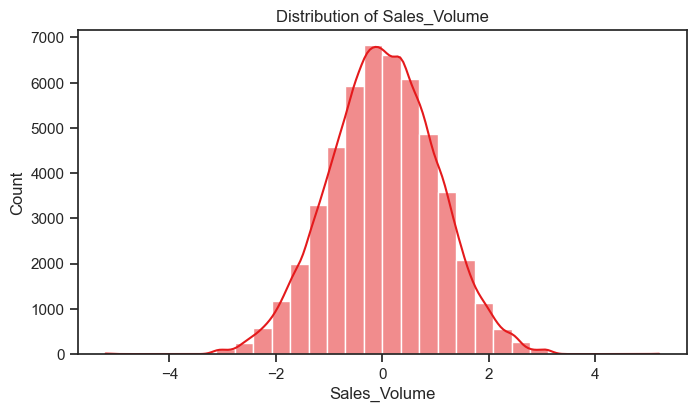

<Figure size 700x400 with 0 Axes>

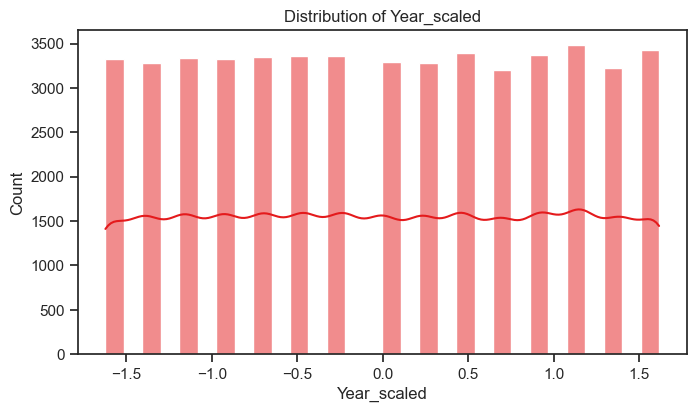

In [49]:
for column in data.columns:
    plt.figure(figsize=(7,4))

    if data[column].dtype == 'object':
        continue
    else:
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')

    plt.show()

In [50]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Year_scaled
0,5 Series,2016,Asia,Red,Petrol,1,0.185480,0.709910,0.696120,0.967097,High,-0.234876
1,i8,2013,North America,Red,Hybrid,0,-1.910600,0.265903,0.103957,-0.414680,Low,-0.928611
2,5 Series,2022,North America,Blue,Petrol,0,1.064091,-1.571302,1.422631,0.536476,Low,1.152595
3,X3,2024,Middle East,Blue,Petrol,0,-1.579968,-1.080967,-0.409750,-0.254658,Low,1.615085
4,7 Series,2020,South America,Black,Diesel,1,-0.951518,0.272829,-0.771921,-0.516670,Low,0.690105


In [61]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    flip_y=0,
    random_state=42
)

print("Original dataset distribution:")
print(Counter(y))
sm = SMOTE(random_state=42)
Xre, yre = sm.fit_resample(X, y)

print("Distribution after SMOTE:")
print(Counter(yre))

Original dataset distribution:
Counter({np.int64(0): 9000, np.int64(1): 1000})
Distribution after SMOTE:
Counter({np.int64(0): 9000, np.int64(1): 9000})


<Axes: ylabel='Count'>

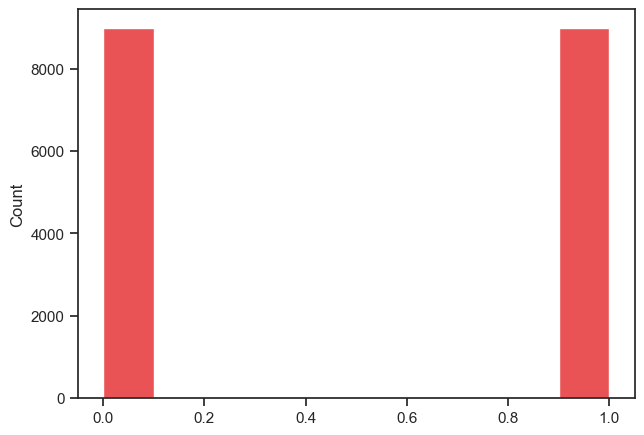

In [62]:
sns.histplot(yre, bins=10, kde=False)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(Xre, yre, test_size=0.2, random_state=42, stratify=yre)


models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Knn": KNeighborsClassifier(),
    "SVN": SVC(),  
    "AdaBoost": AdaBoostClassifier(),
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    print(f"\nModel: {name}")
    print(f"  Accuracy : {acc:.5f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")


Model: Logistic Regression
  Accuracy : 0.98639
  F1 Score : 0.9863
  Precision: 0.9949
  Recall   : 0.9778

Model: Decision Tree
  Accuracy : 0.98333
  F1 Score : 0.9834
  Precision: 0.9796
  Recall   : 0.9872

Model: Random Forest
  Accuracy : 0.99306
  F1 Score : 0.9931
  Precision: 0.9911
  Recall   : 0.9950

Model: Gradient Boosting
  Accuracy : 0.98972
  F1 Score : 0.9897
  Precision: 0.9905
  Recall   : 0.9889

Model: Knn
  Accuracy : 0.98694
  F1 Score : 0.9871
  Precision: 0.9746
  Recall   : 1.0000

Model: SVN
  Accuracy : 0.99389
  F1 Score : 0.9939
  Precision: 0.9950
  Recall   : 0.9928

Model: AdaBoost
  Accuracy : 0.96111
  F1 Score : 0.9614
  Precision: 0.9550
  Recall   : 0.9678


In [68]:
params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Accuracy after hyperparameter tuning: ", grid_search.score(X_test, y_test))
print("")

Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.9915972222222222
Accuracy after hyperparameter tuning:  0.9947222222222222



Accuracy Score: 0.9947222222222222
Precision Score: 0.9933518005540166
Recall Score: 0.9961111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1800
           1       0.99      1.00      0.99      1800

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600



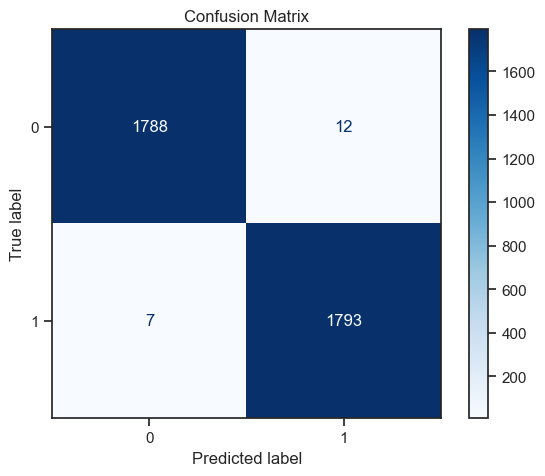

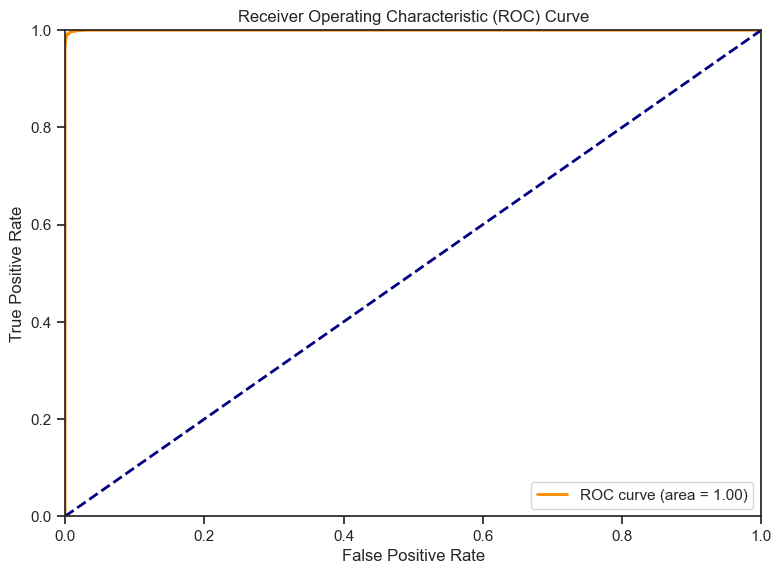

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [74]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Year_scaled
0,5 Series,2016,Asia,Red,Petrol,1,0.185480,0.709910,0.696120,0.967097,High,-0.234876
1,i8,2013,North America,Red,Hybrid,0,-1.910600,0.265903,0.103957,-0.414680,Low,-0.928611
2,5 Series,2022,North America,Blue,Petrol,0,1.064091,-1.571302,1.422631,0.536476,Low,1.152595
3,X3,2024,Middle East,Blue,Petrol,0,-1.579968,-1.080967,-0.409750,-0.254658,Low,1.615085
4,7 Series,2020,South America,Black,Diesel,1,-0.951518,0.272829,-0.771921,-0.516670,Low,0.690105
